In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [58]:
bias = 100
X, y, coef = make_regression(100000, n_features=50, n_informative=50, bias=bias, coef=True, noise=10)

In [59]:
expected_theta = np.hstack([[bias], coef])

In [60]:
class CustomLinearRegression:
    
    def __init__(self):
        pass
    
    def fit(self, X, y):
        self.X = np.hstack([np.ones((X.shape[0], 1)), X])
        self.y = y.reshape(-1, 1)
        
        first = np.linalg.pinv(np.dot(self.X.T, self.X))
        second = np.dot(self.X.T, self.y)
        
        self.theta = np.dot(first, second)
        
        
    def hypothesis(self, X, theta):
        return np.dot(X, theta)
    
    def predict(self, X):
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        return self.hypothesis(X, self.theta).flatten()
        

In [61]:
model = CustomLinearRegression()

In [62]:
model.fit(X, y)

In [63]:
yh = model.predict(X)

In [65]:
print(y[:10])
print(yh[:10])

[-510.56783247  252.88011608  882.20843194  -83.03888166  786.05429283
  951.64444695 -607.57536244  321.14672637  151.25253409 1265.95914893]
[-514.70622563  247.82025019  878.85124254  -96.55252982  793.73542857
  944.60272626 -592.45133472  321.31497121  166.9609853  1260.27914369]


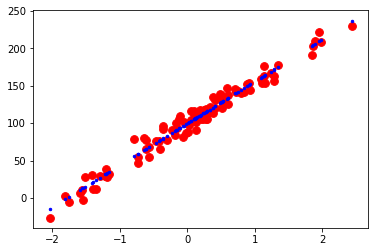

In [19]:
plt.scatter(X, y, color="red", s=60)
plt.scatter(X, yh, color="blue", s=6)

In [20]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [88]:
X, y = load_boston(return_X_y=True)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [43]:
model = CustomLinearRegression()

In [44]:
model.fit(X_train, y_train)

In [45]:
model.theta

array([[98.90178049],
       [55.92378482]])

In [46]:
a1 = model.predict(X_test[:20])

In [47]:
y_test[:20]

array([ 99.71901894, 115.14283245, 147.36771445,  38.9330017 ,
       103.00806431,  96.80108176, 141.53479834, 125.67395218,
       107.10399141,  76.33723414,   2.50082619, 145.03842823,
       112.79805608, 221.98017008, 210.05805221, 135.43314757,
       178.33021141, 137.73168038, 162.83472115, 117.1896553 ])

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
m1 = LinearRegression()

In [53]:
m1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [54]:
a2 = m1.predict(X_test[:20])

In [55]:
sum((y_test[:20] - a1)**2)

1514.6919941444562

In [56]:
sum((y_test[:20] - a2)**2)

1514.6919941444398